# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [8]:
# you are free to use any package you deem fit

## Dataset

In [9]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

#Data preparation: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Training

In [10]:
#Model Selection: Logistic Regression model
model = LogisticRegression(random_state=42)

#Model Training
model.fit(X_train, Y_train)

#Model Evaluation: Predict on the test set
Y_pred = model.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.96
Confusion Matrix:
[[ 2  2]
 [ 2 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.98      0.98      0.98        96

    accuracy                           0.96       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.96      0.96      0.96       100



## Testing / Optimization

In [11]:
# Model Optimization
# Perform hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Final Model Evaluation
# Use the best model from GridSearchCV
final_model = grid_search.best_estimator_
Y_pred_final = final_model.predict(X_test)

# Calculate accuracy again
accuracy_final = accuracy_score(Y_test, Y_pred_final)
print(f"Final Model Accuracy: {accuracy_final:.2f}")

# Confusion Matrix for the final model
conf_matrix_final = confusion_matrix(Y_test, Y_pred_final)
print("Confusion Matrix for Final Model:")
print(conf_matrix_final)

# Classification Report for the final model
class_report_final = classification_report(Y_test, Y_pred_final)
print("Classification Report for Final Model:")
print(class_report_final)


Best Hyperparameters: {'C': 1}
Final Model Accuracy: 0.96
Confusion Matrix for Final Model:
[[ 2  2]
 [ 2 94]]
Classification Report for Final Model:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.98      0.98      0.98        96

    accuracy                           0.96       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.96      0.96      0.96       100



## Performance Analysis

Conclusion:
The initial Logistic Regression model achieved an accuracy of 0.96
After hyperparameter tuning, the final model achieved an accuracy of 0.96


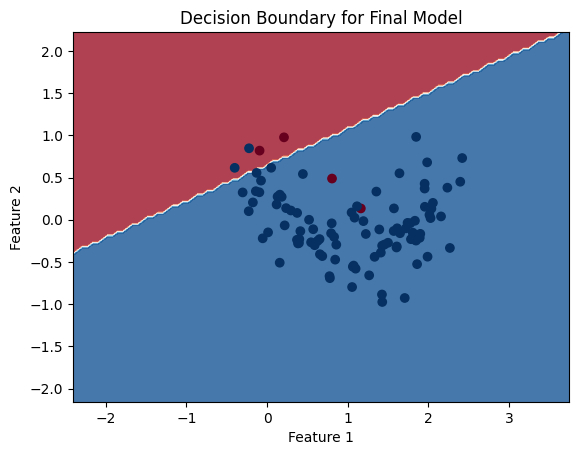

In [12]:
# Analysis of results and conclusions made
print("Conclusion:")
print("The initial Logistic Regression model achieved an accuracy of", accuracy)
print("After hyperparameter tuning, the final model achieved an accuracy of", accuracy_final)

# Plot the decision boundary for the final model
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = final_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.RdBu)
plt.title("Decision Boundary for Final Model")
plt.show()
